In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.8)

import sys

# removeremoveremoveremoveremoveremoveremoveremoveremoveremoveremoveremoveremoveremoveremove
workDir = "/home/bop/Documents/2st-magistrsko_delo/code/mobile-network-anomaly-detection"
sys.path.append(workDir + "/src/")
from measurementDevice import Device
import iperfDetailsParser

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



/usr/local/lib64/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [8]:
# read csv dataset
iperfDetFilename = workDir + "/datasets/20190518_iperf_samsung_detailed_dl.csv"
data_iperf_detailed = pd.read_csv(filepath_or_buffer=iperfDetFilename, sep=',', decimal='.', parse_dates=['timestamp'])

# data_iperf_detailed = data_iperf_detailed.loc[data_iperf_detailed.hash == "8b6799462ee077013b74c0cee9212f60cAndroid"]

print(data_iperf_detailed.head())

# default figure size for inline plots
defFigSize = (15, 8)

   Unnamed: 0           timestamp                                      hash direction  streams_kbps_sum  test_id  duration_in_test_s  test_kbps_mean  stream_0_kbps  stream_0_socket  stream_1_kbps  stream_1_socket  stream_2_kbps  stream_2_socket  stream_3_kbps  stream_3_socket
0           0 2019-01-25 09:18:40  02a1a68c4e6f4e442883cdf21ad38e2e8Android        DL       8601.944908        0                   1     7916.536738    2342.296033                8    2319.268134               10    2003.981959               12    1936.398782               14
1           1 2019-01-25 09:18:41  02a1a68c4e6f4e442883cdf21ad38e2e8Android        DL       9730.838719        0                   2     7916.536738    2364.841221                8    2387.745980               10    2658.064449               12    2320.187069               14
2           2 2019-01-25 09:18:42  02a1a68c4e6f4e442883cdf21ad38e2e8Android        DL      10500.530732        0                   3     7916.536738    2546.433217      

/usr/local/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

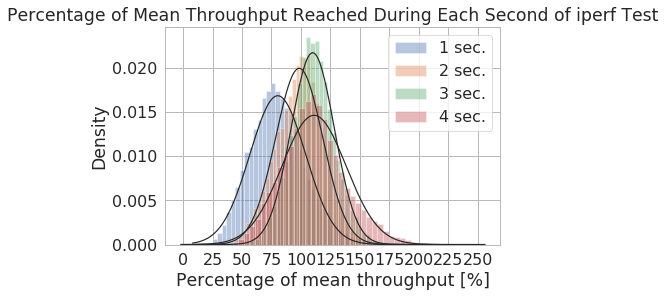

In [9]:
import scipy.stats

data_iperf_detailed["mean_kbps_ratio"] = data_iperf_detailed.streams_kbps_sum / data_iperf_detailed.test_kbps_mean

plt.figure()
for i in range(1, 5):
    plotData = data_iperf_detailed.loc[data_iperf_detailed.duration_in_test_s == i].mean_kbps_ratio * 100
    ax = sns.distplot(plotData, norm_hist=True, kde=False, fit=scipy.stats.norm, label=str(i) + " sec.", hist_kws={"rwidth": 1.0})

ax.grid(b=False, which='major', color="#b8b8b8", linewidth=1.0)
ax.set_axisbelow(True)
ax.set_xticks(np.arange(0, 251, 25))

plt.setp(ax.spines.values(), color="#b8b8b8")
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color="#b8b8b8")

plt.legend()
plt.title("Percentage of Mean Throughput Reached During Each Second of iperf Test")
plt.xlabel("Percentage of mean throughput [%]")
plt.ylabel("Density")

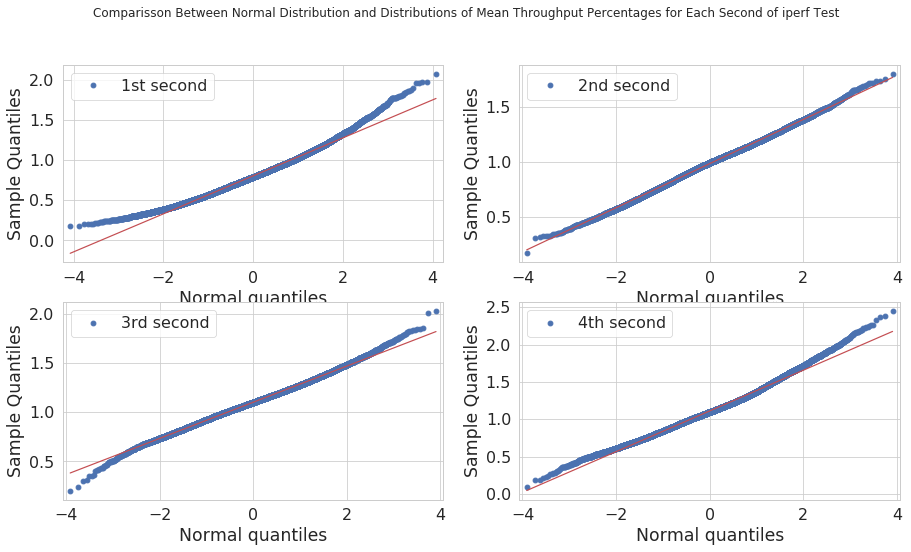

In [11]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats

refDist = scipy.stats.t
refDistArgs = (100,)

plt.close("all")
fig, axes = plt.subplots(2, 2, figsize=defFigSize)

data00 = data_iperf_detailed.loc[data_iperf_detailed.duration_in_test_s == 1].mean_kbps_ratio
qqplot(data00, dist=refDist, distargs=refDistArgs, line='s', ax=axes[0][0], label="1st second")

data01 = data_iperf_detailed.loc[data_iperf_detailed.duration_in_test_s == 2].mean_kbps_ratio
qqplot(data01, line='s', ax=axes[0][1], label="2nd second")

data10 = data_iperf_detailed.loc[data_iperf_detailed.duration_in_test_s == 3].mean_kbps_ratio
qqplot(data10, line='s', ax=axes[1][0], label="3rd second")

data11 = data_iperf_detailed.loc[data_iperf_detailed.duration_in_test_s == 4].mean_kbps_ratio
qqplot(data11, line='s', ax=axes[1][1], label="4th second")

plt.legend()
fig.suptitle("Comparisson Between Normal Distribution and Distributions of Mean Throughput Percentages for Each Second of iperf Test ")

for rows in axes:
    for ax in rows:
        ax.legend()
        ax.set_xlabel("Normal quantiles")
